# EDA - Calidad de Vida
## 0. Previos

Se cargan las bases y las librerías a utilizar.

In [1]:
# Librerías
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Base de interés
base = pd.read_excel('C:/Users/monic/documentos/ds4a/project/data/Calidad de vida relacioada en salud.xlsx')
base.head()

,Identificacion,FE_ALTA,Dimensiones,0_100
0,1645342,2016-09-27,Entorno,75.0
1,1645342,2016-09-27,Psicologico,81.0
2,1645342,2016-09-27,Relaciones interpersonales,100.0
3,1645342,2016-09-27,Salud fisica,25.0
4,1645342,2017-12-21,Entorno,63.0


In [3]:
# Base de ids
ids = pd.read_excel('C:/Users/monic/documentos/ds4a/project/data/Datos basicos.xlsx')
ids.head()

,ID,edad,genero,escolaridad,EstadoCivil,Preferencia,Departamento,Ciudad,Estrato,Zona,AcompaÃ±ante,NivelSocioEconomico,Ocupacion,Regimen,TipoAfiliacion,RelacionLaboral,FE_NACIMIENTO
0,500547,58.0,M,SECUNDARIA,CASADO (A),HETEROSEXUAL,ANTIOQUIA,MEDELLIN,3.0,URBANA,PACIENTE,A,EMPLEADO,CONTRIBUTIVO,COTIZANTE,EMPLEADO,1962-05-19 00:00:00
1,500588,15.0,M,PRIMARIA,SOLTERO (A),NaN,CUNDINAMARCA,BOGOTA,2.0,URBANA,MADRE,B,ESTUDIANTE,CONTRIBUTIVO,BENEFICIARIO,MENOR NO LABORA,2004-12-19 00:00:00
2,502989,29.0,M,UNIVERSITARIO,SOLTERO (A),HETEROSEXUAL,ANTIOQUIA,MEDELLIN,3.0,URBANA,MADRE,A,SIN DEFINIR,CONTRIBUTIVO,BENEFICIARIO,SIN EMPLEO,1990-08-22 00:00:00
3,506808,11.0,M,EDAD PREESCOLAR,SOLTERO (A),HETEROSEXUAL,ANTIOQUIA,BELLO,1.0,URBANA,MADRE,A,ESTUDIANTE,CONTRIBUTIVO,BENEFICIARIO,MENOR NO LABORA,2008-10-06 00:00:00
4,512938,22.0,F,SECUNDARIA,SOLTERO (A),HETEROSEXUAL,ANTIOQUIA,MEDELLIN,3.0,URBANA,PACIENTE,A,EMPLEADO,CONTRIBUTIVO,COTIZANTE,EMPLEADO,1997-10-15 00:00:00


## 1. Tipos

In [4]:
base.describe()

,Identificacion,0_100
count,1.016000e+03,1012.000000
mean,1.258658e+06,67.318182
std,4.093158e+05,18.585210
min,5.029890e+05,6.000000
25%,9.165100e+05,56.000000
50%,1.333454e+06,69.000000
75%,1.617372e+06,81.000000
max,1.997065e+06,100.000000


In [5]:
base.dtypes

Identificacion             int64
FE_ALTA           datetime64[ns]
Dimensiones               object
0_100                    float64
dtype: object

Los tipos son consistentes con lo esperado: Identificación es de tipo numérico, FE_ALTA es fecha, Dimensiones es string, y 0_100 es numérico.

## 2. Aporte Conceptual

Se espera que las dimensiones evaluadas aporten a entender cómo se encuentra la calidad de vida, y poder relacionar estas variables con la dimesión de adherencia. La hipótesis es que a mayor adherencia mejor es la calidad de vida de los pacientes.

## 3. Calidad
### 3.6 Cruce con la tabla de identificaciones

In [6]:
# Identificaciones únicas en la tabla de pacientes: 872
ids_unicos = ids.groupby(['ID'])['edad'].count().reset_index()
ids_unicos.describe()

,ID,edad
count,8.720000e+02,872.000000
mean,1.259526e+06,1.017202
std,4.343817e+05,0.138642
min,5.005470e+05,1.000000
25%,8.887368e+05,1.000000
50%,1.258122e+06,1.000000
75%,1.647997e+06,1.000000
max,1.999629e+06,3.000000


In [7]:
# Identificaciones únias en la tabla de Calidad: 146
ids_base = base.groupby(['Identificacion']).count().reset_index()
ids_base.describe()

,Identificacion,FE_ALTA,Dimensiones,0_100
count,1.460000e+02,146.000000,146.000000,146.000000
mean,1.265753e+06,6.958904,6.958904,6.931507
std,4.092490e+05,6.268561,6.268561,6.290285
min,5.029890e+05,4.000000,4.000000,0.000000
25%,9.266310e+05,4.000000,4.000000,4.000000
50%,1.259236e+06,4.000000,4.000000,4.000000
75%,1.587124e+06,8.000000,8.000000,8.000000
max,1.997065e+06,36.000000,36.000000,36.000000


In [8]:
# Cruce de las dos tablas
cruce = ids_base.merge(ids_unicos, how = 'left', left_on = 'Identificacion', right_on ='ID')
cruce.describe()

,Identificacion,FE_ALTA,Dimensiones,0_100,ID,edad
count,1.460000e+02,146.000000,146.000000,146.000000,1.460000e+02,146.000000
mean,1.265753e+06,6.958904,6.958904,6.931507,1.265753e+06,1.006849
std,4.092490e+05,6.268561,6.268561,6.290285,4.092490e+05,0.082761
min,5.029890e+05,4.000000,4.000000,0.000000,5.029890e+05,1.000000
25%,9.266310e+05,4.000000,4.000000,4.000000,9.266310e+05,1.000000
50%,1.259236e+06,4.000000,4.000000,4.000000,1.259236e+06,1.000000
75%,1.587124e+06,8.000000,8.000000,8.000000,1.587124e+06,1.000000
max,1.997065e+06,36.000000,36.000000,36.000000,1.997065e+06,2.000000


Se encuentra que todos los pacientes de la tabla de calidad están en la tabla de datos demográficos.

## 4. Exploración
### 4.1 Distribuciones
### FE_ALTA

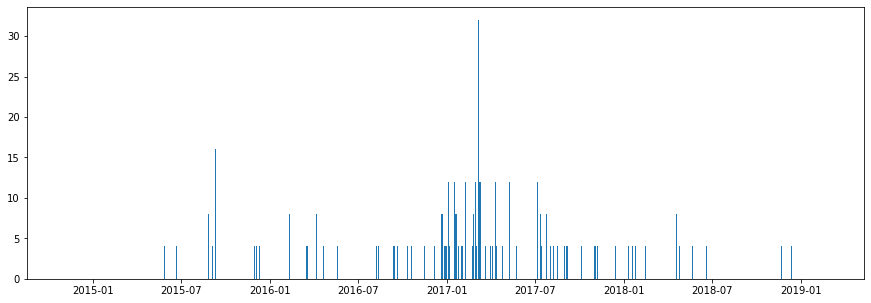

In [9]:
# plot
base_gf = base.groupby('FE_ALTA').count().reset_index()

fig, ax = plt.subplots(figsize=(15, 5))
rects1 = ax.bar(base_gf['FE_ALTA'], base_gf['Identificacion'] )

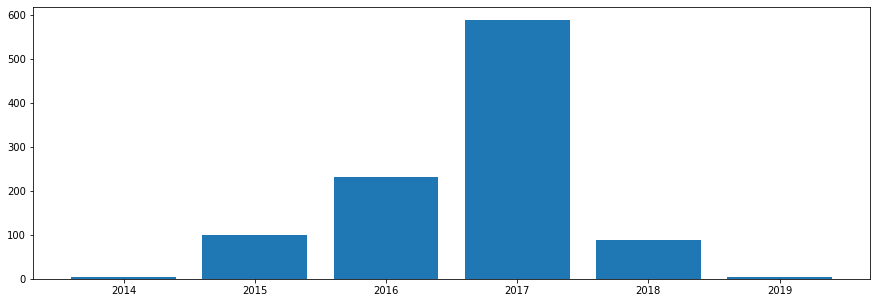

In [10]:
base_gf['year'] = base_gf['FE_ALTA'].apply( lambda x: x.year )
base_gf_gy = base_gf.groupby('year')['Identificacion'].sum().reset_index()

fig, ax = plt.subplots(figsize=(15, 5))
rects1 = ax.bar(base_gf_gy['year'], base_gf_gy['Identificacion'] )

Se encuentra que la mayoría de las encuestas están para 2017. El número de encuestas para 2018 en adelante es muy bajo. Esto podría tener como consecuencia que la información no pueda usarse.

### Dimensiones

In [11]:
base['year'] = base['FE_ALTA'].apply( lambda x: x.year )
base.head()

,Identificacion,FE_ALTA,Dimensiones,0_100,year
0,1645342,2016-09-27,Entorno,75.0,2016
1,1645342,2016-09-27,Psicologico,81.0,2016
2,1645342,2016-09-27,Relaciones interpersonales,100.0,2016
3,1645342,2016-09-27,Salud fisica,25.0,2016
4,1645342,2017-12-21,Entorno,63.0,2017


In [12]:
base['year'] = base['FE_ALTA'].apply( lambda x: x.year )

base_gdy = base.groupby(['Dimensiones', 'year']).count().reset_index()
base_gdy_pivot = base_gdy.pivot('Dimensiones', 'year', 'Identificacion')

base_gdy

,Dimensiones,year,Identificacion,FE_ALTA,0_100
0,Entorno,2014,1,1,1
1,Entorno,2015,25,25,25
2,Entorno,2016,58,58,58
3,Entorno,2017,147,147,146
4,Entorno,2018,22,22,22
5,Entorno,2019,1,1,1
6,Psicologico,2014,1,1,1
7,Psicologico,2015,25,25,25
8,Psicologico,2016,58,58,58
9,Psicologico,2017,147,147,146


Se encuentra que el número de dimensiones evaluadas no varía por año.

### 0_100

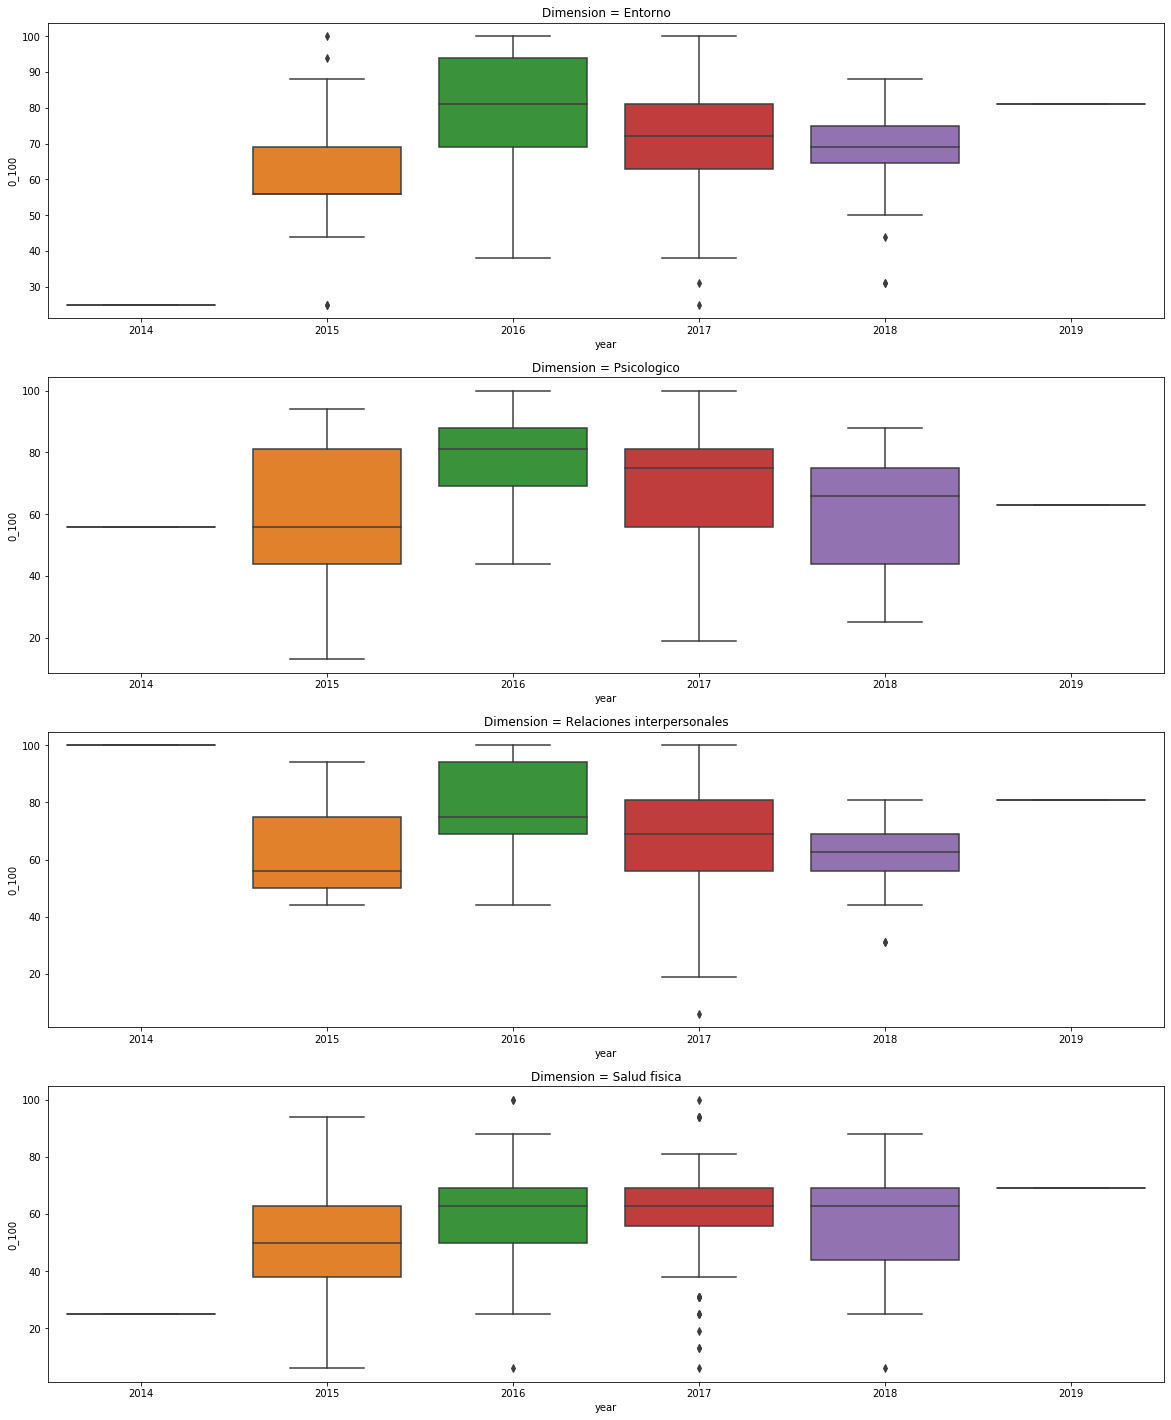

In [13]:
dimensiones = base['Dimensiones'].unique()
len(dimensiones)

plt.figure(figsize=(20,25))

for i, d in enumerate(dimensiones):
    basex = base[base['Dimensiones'] == d]
    plt.subplot(len(dimensiones), 1,i+1)
    sns.boxplot(x="year", y="0_100", data=basex)
    plt.title("Dimension = " + d );

Se encuentra para todos los indicadores que en 2016 tienen valores más altos que en los demás años. Así como 2018 se parece un poco más a 2017. En general no se observan valores atípicos, todos los valores están dentro de lo esperado [0, 100].

## 5. Definiciones Modelo de Datos
### 5.1 Transformación y Limpieza

* Esta tabla debería consolidarse a nivel ID, Fecha. Esto implica hacer una transposición para que las dimensiones queden por columnas y no por filas. 

* Si el cruce se hace por fecha (i.e. YYYYMM) es necesario realizar esta transformación en la variable `FE_ALTA`

### 5.2 Modelo de Datos

El cruce debe hacerce por `Identificacion` y `FE_ALTA`. Habiendo realizado una transposición de los datos de dimensiones.

### 5.3 Definición de Variables

* Promedio de la dimensión $i$ (calidad de vida) en los últimos $n$ meses.
* Variación de la dimensión $i$ (calidad de vida) (hoy vs hace $n$ meses).